# Project Case Scenario - Boston MA

The following describes the dataset variables:

- CRIM - per capita crime rate by town

- ZN - proportion of residential land zoned for lots over 25,000 sq.ft.

- INDUS - proportion of non-retail business acres per town.

- CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)

- NOX - nitric oxides concentration (parts per 10 million)

- RM - average number of rooms per dwelling

- AGE - proportion of owner-occupied units built prior to 1940

- DIS - weighted distances to five Boston employment centres

- RAD - index of accessibility to radial highways

- TAX - full-value property-tax rate per $10,000

- PTRATIO - pupil-teacher ratio by town

- LSTAT - % lower status of the population

- MEDV - Median value of owner-occupied homes in $1000's


This data was modified for this course and the link to the complete dataset can be found in the 
<a href=https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_boston.html>sklearn.datasets</a>
 library

In [1]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [2]:
boston_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
boston_df = pd.read_csv(boston_url, index_col=0)

In [3]:
boston_df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


In [4]:
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  LSTAT    506 non-null    float64
 12  MEDV     506 non-null    float64
dtypes: float64(13)
memory usage: 55.3 KB


In [5]:
boston_df.loc[(boston_df['AGE'] <= 35), 'AGE_GROUP'] = '35 years and younger'
boston_df.loc[(boston_df['AGE'] > 35) & (boston_df['AGE'] < 70), 'AGE_GROUP'] = 'between 35 and 70 years'
boston_df.loc[(boston_df['AGE'] >= 70), 'AGE_GROUP'] = '70 years and older'

In [6]:
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,AGE_GROUP
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0,between 35 and 70 years
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6,70 years and older
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7,between 35 and 70 years
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4,between 35 and 70 years
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2,between 35 and 70 years


Text(0, 0.5, 'Median value')

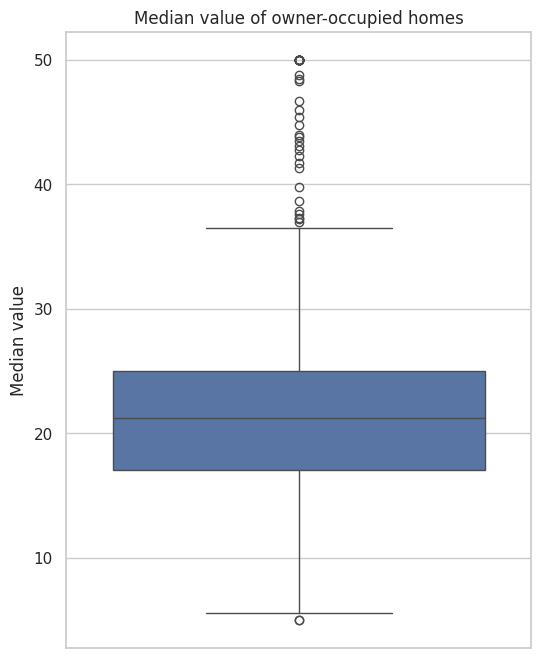

In [7]:
sns.set(style="whitegrid")
pyplot.figure(figsize=[6,8])
sns.boxplot(data=boston_df, y='MEDV')
pyplot.title('Median value of owner-occupied homes')
pyplot.ylabel('Median value')

Text(0.5, 1.0, 'Number of properties that bounds the Charles River')

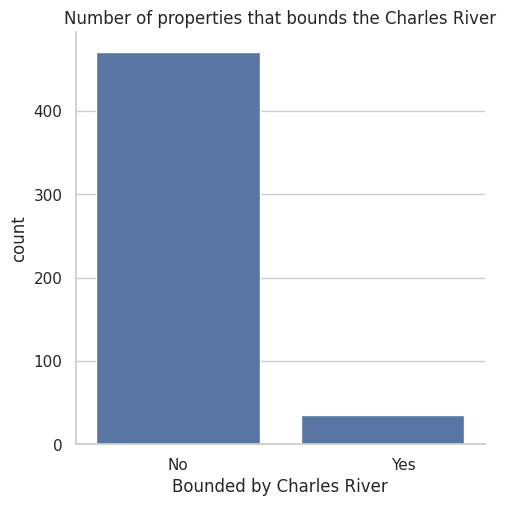

In [8]:
sns.catplot(data=boston_df, x='CHAS', kind='count')
pyplot.xticks(ticks=[0.0,1.1], labels=['No','Yes'])
pyplot.xlabel('Bounded by Charles River')
pyplot.title('Number of properties that bounds the Charles River')

Text(0.5, 1.0, 'Median value of owner-occupied homes vs the Age')

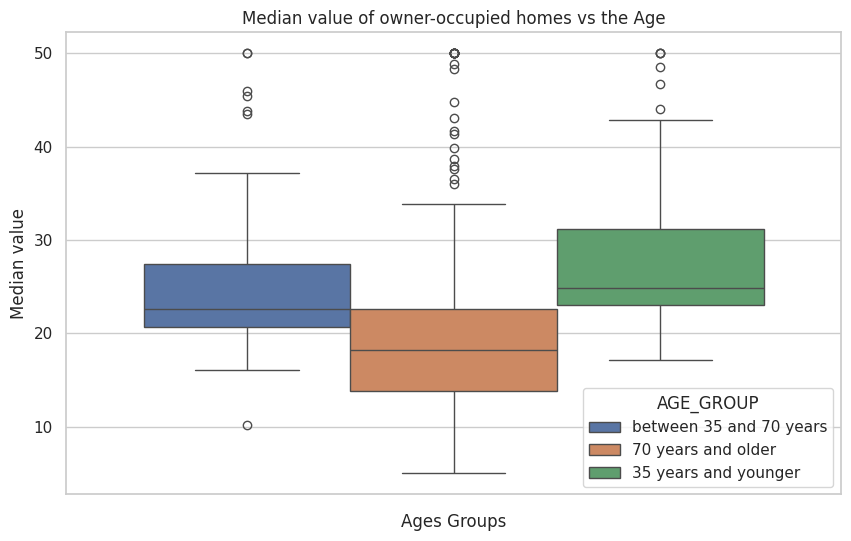

In [9]:
pyplot.figure(figsize=[10,6])
sns.boxplot(data=boston_df, y='MEDV', hue='AGE_GROUP')
pyplot.xlabel('Ages Groups')
pyplot.ylabel('Median value')
pyplot.title('Median value of owner-occupied homes vs the Age')

Text(0, 0.5, 'Proportion of Non-retail Business Acres')

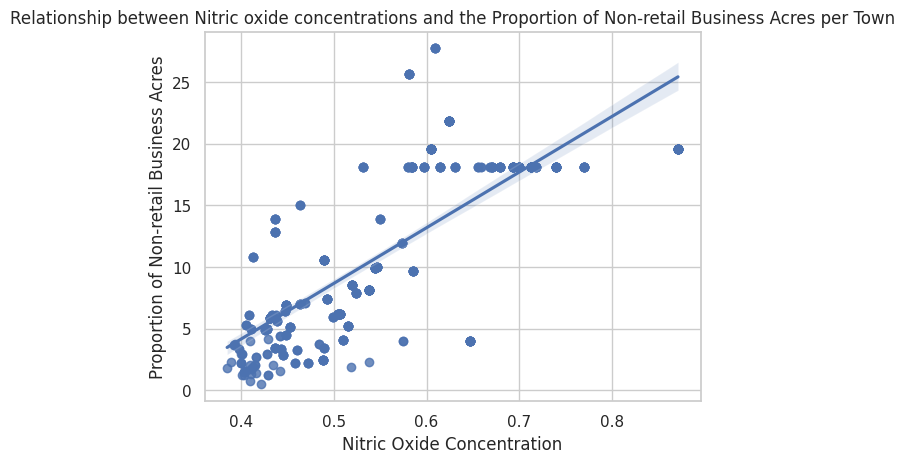

In [10]:
pyplot.Subplot
sns.regplot(x="NOX", y="INDUS", data=boston_df)
pyplot.title('Relationship between Nitric oxide concentrations and the Proportion of Non-retail Business Acres per Town')
pyplot.xlabel('Nitric Oxide Concentration')
pyplot.ylabel('Proportion of Non-retail Business Acres')

Text(0.5, 12.44444444444443, 'Pupil to Teacher Ratio')

<Figure size 1000x600 with 0 Axes>

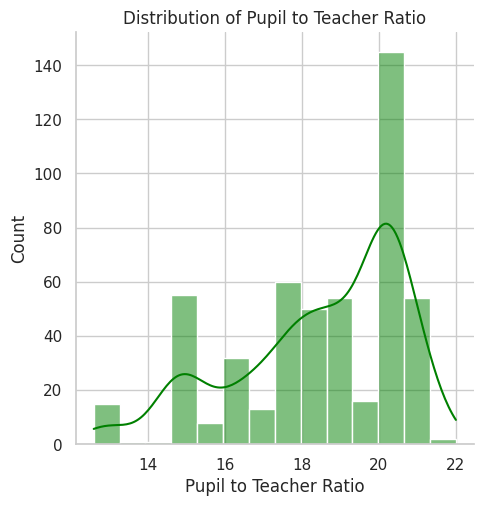

In [11]:
pyplot.figure(figsize=[10,6])
sns.displot(boston_df['PTRATIO'], kde=True, color='green')
pyplot.title('Distribution of Pupil to Teacher Ratio')
pyplot.xlabel('Pupil to Teacher Ratio')

## Is there a significant difference in median value of houses bounded by the Charles river or not?

State the hypothesis
* $H_0: µ_1 = µ_2$ There is no difference in median value of houses bounded by the Charles river
* $H_1: µ_1 ≠ µ_2$ There is a difference in median value of houses bounded by the Charles river
* α = 0.05

We can use the Levene's Test to check test significance

In [12]:
scipy.stats.levene(boston_df[boston_df['CHAS'] == 1.0]['MEDV'],
                   boston_df[boston_df['CHAS'] == 0.0]['MEDV'], center='mean')

LeveneResult(statistic=8.75190489604598, pvalue=0.003238119367639829)

Since the p-value is less than 0.05 the variance are not equal

In [13]:
scipy.stats.ttest_ind(boston_df[boston_df['CHAS'] == 1.0]['MEDV'],
                   boston_df[boston_df['CHAS'] == 0.0]['MEDV'], equal_var = False)

TtestResult(statistic=3.113291312794837, pvalue=0.003567170098137517, df=36.876408797611994)

**Conclusion:** Since the p-value is less than alpha value 0.05, we reject the null hypothesis as there is enough proof that there is a statistical difference in median value of houses bounded by the Charles river or not

## Is there a difference in Median values of houses for each proportion of owner occupied units built prior to 1940?

First, we group the data into cateries as the one-way ANOVA can't work with continuous variable - we will create a new column for this newly assigned group our categories will be:
* 35 years and younger
* between 35 and 70 years
* 70 years and older


State the hypothesis
* $H_0: µ_1 = µ_2 = µ_3$ The three population means are equal
* $H_1:$ At least one of the means differ
* α = 0.05


Test for equality of variance

In [14]:
scipy.stats.levene(boston_df[boston_df['AGE_GROUP'] == '35 years and younger']['MEDV'],
                   boston_df[boston_df['AGE_GROUP'] == 'between 35 and 70 years']['MEDV'], 
                   boston_df[boston_df['AGE_GROUP'] == '70 years and older']['MEDV'], 
                   center='mean')

LeveneResult(statistic=2.7806200293748304, pvalue=0.06295337343259205)

Since the p-value is greater than 0.05, we can assume equality of variance.

First, separate the three samples (one for each category) into a variable each.

In [15]:
group_1 = boston_df[boston_df['AGE_GROUP'] == '35 years and younger']['MEDV']
group_2 = boston_df[boston_df['AGE_GROUP'] == 'between 35 and 70 years']['MEDV']
group_3 = boston_df[boston_df['AGE_GROUP'] == '70 years and older']['MEDV']

Now, run a one-way ANOVA.

In [16]:
f_statistic, p_value = scipy.stats.f_oneway(group_1, group_2, group_3)
print("F_Statistic: {0}, P-Value: {1}".format(f_statistic,p_value))

F_Statistic: 36.40764999196599, P-Value: 1.7105011022702984e-15


**Conclusion:** Since the p-value is less than 0.05, we will reject the null hypothesis as there is significant evidence that at least one of the means differ.

## Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town?

State the hypothesis:
* $H_0:$ Nitric oxide concentrations is not correlated with proportion of non-retail business acres per town
* $H_1:$ Nitric oxide concentrations is correlated with proportion of non-retail business acres per town
* α = 0.05

Since they are both continuous variables we can use a pearson correlation test and draw a scatter plot

In [17]:
scipy.stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])

PearsonRResult(statistic=0.7636514469209151, pvalue=7.913361061239527e-98)

**Conclusion:** Since the p-value  (Sig. (2-tailed)  < 0.05, we reject  the Null hypothesis and conclude that there  exists a relationship between  Nitric oxide concentrations and proportion of non-retail business acres per town.

## What is the impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes?

State the hypothesis:
* $H_0: β1$ = 0 Weighted distance to the five Boston employment centres has no effect on the median value of owner occupied homes
* $H_1: β1$ is not equal to 0 Weighted distance to the five Boston employment centres has an effect on the median value of owner occupied homes
* α = 0.05

In [18]:
x = boston_df['DIS']
y = boston_df['MEDV']
x = sm.add_constant(x)
model = sm.OLS(y,x).fit()
predictions = model.predict(x)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Wed, 13 Mar 2024   Prob (F-statistic):           1.21e-08
Time:                        11:28:29   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

R-square is 0.062, R will be √0.062, correlation coefficient is 0.249 (close to 0). There is a very weak correlation between the weighted distance  to the five Boston employment centres and the median value of owner occupied homes

The p-value is less than the alpha (α) level = 0.05, so we reject the null hypothesis as there is evidence that additional weighted distance to the five Boston employment centres has an effect on the median value of owner occupied homes. The coefficient 1.0916 means that median value of owner occupied homes get more 1.0916 value for additional weighted distance to the five Boston employment centres.
